**training on att_faces_Dataset and testing on our gorup_dataset**

Loading AT&T Dataset...
AT&T Dataset: Loaded 400 images with shape 10304
Loading Group Dataset...
Group Dataset: Loaded 40 images with shape 10304
Extracting features using PCA on AT&T Dataset...
Transforming Group Dataset with PCA...
Classifying using PCA features...
PCA Accuracy: 0.17
Classification Report:
              precision    recall  f1-score   support

          s1       0.19      0.70      0.30        10
          s2       0.00      0.00      0.00        10
         s26       0.00      0.00      0.00         0
         s28       0.00      0.00      0.00         0
          s3       0.00      0.00      0.00        10
         s32       0.00      0.00      0.00         0
          s4       0.00      0.00      0.00        10

    accuracy                           0.17        40
   macro avg       0.03      0.10      0.04        40
weighted avg       0.05      0.17      0.07        40



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

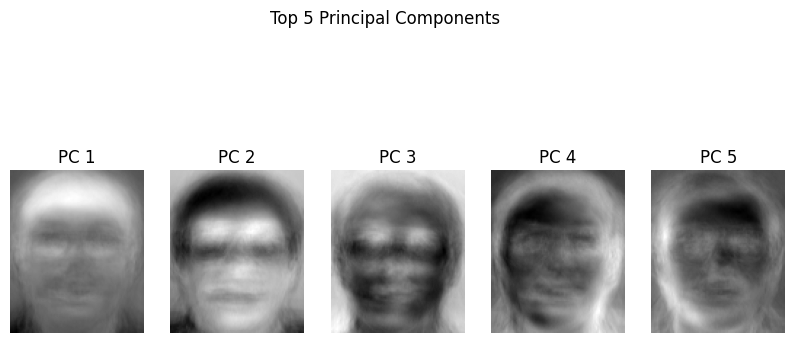

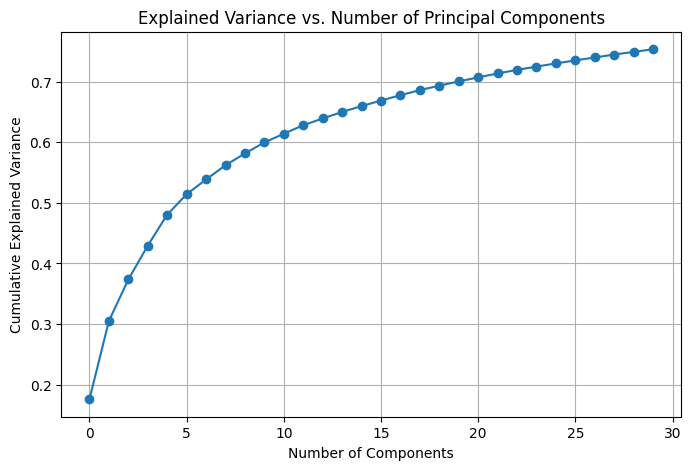

In [10]:
import os
import numpy as np  # type: ignore
from imageio.v3 import imread
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Load Dataset 
def load_dataset(folder_path, target_shape=(112, 92)):
    data = []
    labels = []
    for person_folder in sorted(os.listdir(folder_path)):
        person_path = os.path.join(folder_path, person_folder)
        if os.path.isdir(person_path):
            for image_name in sorted(os.listdir(person_path)):
                if image_name.endswith(('.jpg', '.png', '.jpeg', '.pgm')):
                    image_path = os.path.join(person_path, image_name)
                    image = imread(image_path, mode='F')
                    image_resized = resize(image, target_shape)
                    data.append(image_resized.flatten())
                    labels.append(person_folder)
    return np.array(data), np.array(labels)

# Step 2: Feature Extraction with PCA
def extract_features_pca(data, n_components):
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    return data_pca, pca

# Step 3: Classify using Support Vector Machine (SVM)
def classify_svm(train_features, train_labels, test_features, test_labels):
    svm = SVC(kernel='rbf')  # You can experiment with different kernels (e.g., 'rbf', 'poly')
    svm.fit(train_features, train_labels)
    predictions = svm.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    return accuracy, predictions

# Step 4: Evaluate the Model
def evaluate_model(predictions, test_labels):
    print("Classification Report:")
    print(classification_report(test_labels, predictions))

# Step 5: Visualize PCA and HOG
def visualize_pca(pca_model, image_shape):
    # Plot the first few principal components as images
    components = pca_model.components_.reshape((-1, *image_shape))
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(components[i], cmap='gray')
        plt.title(f"PC {i+1}")
        plt.axis('off')
    plt.suptitle("Top 5 Principal Components")
    plt.show()

def plot_explained_variance(pca_model):
    plt.figure(figsize=(8, 5))
    plt.plot(np.cumsum(pca_model.explained_variance_ratio_), marker='o')
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("Explained Variance vs. Number of Principal Components")
    plt.grid()
    plt.show()

# Step 6: Main Program
if __name__ == "__main__":
    # Paths and Parameters
    att_faces_folder = "./att_faces_Dataset"
    group_dataset_folder = "./group_dataset_v2"
    target_shape = (112, 92)
    n_components = 30  # Reduced to test with smaller components

    # Load AT&T Dataset (Training)
    print("Loading AT&T Dataset...")
    att_data, att_labels = load_dataset(att_faces_folder, target_shape=target_shape)
    print(f"AT&T Dataset: Loaded {att_data.shape[0]} images with shape {att_data.shape[1]}")

    # Load Group Dataset (Testing)
    print("Loading Group Dataset...")
    group_data, group_labels = load_dataset(group_dataset_folder, target_shape=target_shape)
    print(f"Group Dataset: Loaded {group_data.shape[0]} images with shape {group_data.shape[1]}")

    # PCA Feature Extraction
    print("Extracting features using PCA on AT&T Dataset...")
    att_pca, pca_model = extract_features_pca(att_data, n_components=n_components)

    print("Transforming Group Dataset with PCA...")
    group_pca = pca_model.transform(group_data)

    # Classify with PCA Features using SVM
    print("Classifying using PCA features...")
    pca_accuracy, pca_predictions = classify_svm(att_pca, att_labels, group_pca, group_labels)
    print(f"PCA Accuracy: {pca_accuracy:.2f}")
    evaluate_model(pca_predictions, group_labels)

    # Visualize PCA
    visualize_pca(pca_model, target_shape)
    plot_explained_variance(pca_model)
